In [2]:
# Bibliotecas utilizadas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Datasets utilizados
df_majors = pd.read_csv('./data/Mens_Tennis_Grand_Slam_Winner.csv')
df_ATP_1973_to_2010 = pd.read_csv('./data/df_ATP_1973_to_2010.csv')

# Dataset - Ganadores 4 Grand Slams

In [4]:
df_majors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   YEAR                         292 non-null    int64  
 1   TOURNAMENT                   292 non-null    object 
 2   WINNER                       292 non-null    object 
 3   RUNNER-UP                    292 non-null    object 
 4   WINNER_NATIONALITY           292 non-null    object 
 5   WINNER_ATP_RANKING           63 non-null     float64
 6   RUNNER-UP_ATP_RANKING        64 non-null     float64
 7   WINNER_LEFT_OR_RIGHT_HANDED  292 non-null    object 
 8   TOURNAMENT_SURFACE           292 non-null    object 
 9   WINNER_PRIZE                 217 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 22.9+ KB


In [5]:
# Convertir nombres 
def convertir_nombre(nombre):
    partes = nombre.split()
    inicial = partes[0][0]  # Primera letra del primer nombre
    apellido = partes[-1]  # Apellido
    return f'{inicial}. {apellido}'

In [6]:
df_majors['WINNER'] = df_majors['WINNER'].apply(convertir_nombre)
df_majors['RUNNER-UP'] = df_majors['RUNNER-UP'].apply(convertir_nombre)

df_majors

,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
0,2023,Australian Open,N. Djokovic,S. Tsitsipas,Serbian,1.0,3.0,right,Plexicushion Prestige,2050000.0
1,2022,U.S. Open,C. Alcaraz,C. Rudd,Spanish,2.0,5.0,right,DecoTurf - outdoors,2600000.0
2,2022,Wimbledon,N. Djokovic,N. Kyrgios,Serbian,NaN,25.0,right,Grass / Outdoor,2507460.0
3,2022,French Open,R. Nadal,C. Rudd,Spanish,5.0,8.0,left,Clay,1870000.0
4,2022,Australian Open,R. Nadal,D. Medvedev,Spanish,5.0,2.0,left,Plexicushion Prestige,4400000.0
...,...,...,...,...,...,...,...,...,...,...
287,1951,Australian Open,D. Savitt,K. McGregor,American,NaN,NaN,right,Grass,NaN
288,1950,U.S. Open,A. Larsen,H. Flam,American,NaN,NaN,right,outdoors,NaN
289,1950,Wimbledon,J. Patty,F. Sedgman,American,NaN,NaN,right,Grass / Outdoor,NaN
290,1950,French Open,B. Patty,J. Drobny,American,NaN,NaN,right,Clay,NaN


In [7]:
nulos = (df_majors.isnull().mean())*100
nulos

YEAR                            0.000000
TOURNAMENT                      0.000000
WINNER                          0.000000
RUNNER-UP                       0.000000
WINNER_NATIONALITY              0.000000
WINNER_ATP_RANKING             78.424658
RUNNER-UP_ATP_RANKING          78.082192
WINNER_LEFT_OR_RIGHT_HANDED     0.000000
TOURNAMENT_SURFACE              0.000000
WINNER_PRIZE                   25.684932
dtype: float64

In [8]:
df_majors.value_counts

<bound method DataFrame.value_counts of      YEAR       TOURNAMENT       WINNER     RUNNER-UP WINNER_NATIONALITY  \
0    2023  Australian Open  N. Djokovic  S. Tsitsipas            Serbian   
1    2022        U.S. Open   C. Alcaraz       C. Rudd            Spanish   
2    2022        Wimbledon  N. Djokovic    N. Kyrgios            Serbian   
3    2022      French Open     R. Nadal       C. Rudd            Spanish   
4    2022  Australian Open     R. Nadal   D. Medvedev            Spanish   
..    ...              ...          ...           ...                ...   
287  1951  Australian Open    D. Savitt   K. McGregor           American   
288  1950        U.S. Open    A. Larsen       H. Flam           American   
289  1950        Wimbledon     J. Patty    F. Sedgman           American   
290  1950      French Open     B. Patty     J. Drobny           American   
291  1950  Australian Open   F. Sedgman   K. McGregor         Australian   

     WINNER_ATP_RANKING  RUNNER-UP_ATP_RANKING 

In [9]:
df_majors.head()

,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
0,2023,Australian Open,N. Djokovic,S. Tsitsipas,Serbian,1.0,3.0,right,Plexicushion Prestige,2050000.0
1,2022,U.S. Open,C. Alcaraz,C. Rudd,Spanish,2.0,5.0,right,DecoTurf - outdoors,2600000.0
2,2022,Wimbledon,N. Djokovic,N. Kyrgios,Serbian,NaN,25.0,right,Grass / Outdoor,2507460.0
3,2022,French Open,R. Nadal,C. Rudd,Spanish,5.0,8.0,left,Clay,1870000.0
4,2022,Australian Open,R. Nadal,D. Medvedev,Spanish,5.0,2.0,left,Plexicushion Prestige,4400000.0


In [10]:
# Columnas con nulos 
df_majors[['WINNER_ATP_RANKING','RUNNER-UP_ATP_RANKING', 'WINNER_PRIZE']]

,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_PRIZE
0,1.0,3.0,2050000.0
1,2.0,5.0,2600000.0
2,NaN,25.0,2507460.0
3,5.0,8.0,1870000.0
4,5.0,2.0,4400000.0
...,...,...,...
287,NaN,NaN,NaN
288,NaN,NaN,NaN
289,NaN,NaN,NaN
290,NaN,NaN,NaN


In [11]:
# Cambio de Australian Open (Dec / Jan) por Australian Open
df_majors['TOURNAMENT'] = df_majors['TOURNAMENT'].str.replace(r'Australian Open \(Dec\)|Australian Open \(Jan\)', 'Australian Open', regex = True)
df_majors['TOURNAMENT'] = df_majors['TOURNAMENT'].str.replace(r'French Open', 'Roland Garros', regex = True)

In [12]:
df_majors['TOURNAMENT'].value_counts()

TOURNAMENT
Australian Open    74
U.S. Open          73
Roland Garros      73
Wimbledon          72
Name: count, dtype: int64

In [13]:
# Media de WINNER_PRIZE de cada uno de los torneos
precios_por_torneo = df_majors.groupby('TOURNAMENT')['WINNER_PRIZE'].mean()
precios_por_torneo

TOURNAMENT
Australian Open    1.156032e+06
Roland Garros      1.466629e+06
U.S. Open          1.013036e+06
Wimbledon          5.990386e+05
Name: WINNER_PRIZE, dtype: float64

In [14]:
# Medias de cada uno de los torneos
tournament_means = {
    'Australian Open': df_majors.loc[df_majors['TOURNAMENT'].str.contains('Australian Open', case = False), 'WINNER_PRIZE'].mean(),
    'Roland Garros': df_majors.loc[df_majors['TOURNAMENT'].str.contains('Roland Garros', case = False), 'WINNER_PRIZE'].mean(),
    'U.S. Open': df_majors.loc[df_majors['TOURNAMENT'].str.contains('U.S. Open', case = False), 'WINNER_PRIZE'].mean(),
    'Wimbledon': df_majors.loc[df_majors['TOURNAMENT'].str.contains('Wimbledon', case = False), 'WINNER_PRIZE'].mean(),
}
# Funcion reemplazo
def sustitucion_nulos(row):
    tournament = row['TOURNAMENT']
    winner_prize = row['WINNER_PRIZE']
    if pd.isnull(winner_prize) and any(t in tournament for t in tournament_means.key()):
        return tournament_means(next(t for t in tournament_means.key() if t in tournament))
    else:
        return winner_prize
    
df_majors['WINNER_PRIZE'] = df_majors['WINNER_PRIZE'].fillna(df_majors['TOURNAMENT'].map(lambda x: tournament_means[next((t for t in tournament_means.keys() if t in x), None)])).round(1)
df_majors

,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
0,2023,Australian Open,N. Djokovic,S. Tsitsipas,Serbian,1.0,3.0,right,Plexicushion Prestige,2050000.0
1,2022,U.S. Open,C. Alcaraz,C. Rudd,Spanish,2.0,5.0,right,DecoTurf - outdoors,2600000.0
2,2022,Wimbledon,N. Djokovic,N. Kyrgios,Serbian,NaN,25.0,right,Grass / Outdoor,2507460.0
3,2022,Roland Garros,R. Nadal,C. Rudd,Spanish,5.0,8.0,left,Clay,1870000.0
4,2022,Australian Open,R. Nadal,D. Medvedev,Spanish,5.0,2.0,left,Plexicushion Prestige,4400000.0
...,...,...,...,...,...,...,...,...,...,...
287,1951,Australian Open,D. Savitt,K. McGregor,American,NaN,NaN,right,Grass,1156031.7
288,1950,U.S. Open,A. Larsen,H. Flam,American,NaN,NaN,right,outdoors,1013036.4
289,1950,Wimbledon,J. Patty,F. Sedgman,American,NaN,NaN,right,Grass / Outdoor,599038.6
290,1950,Roland Garros,B. Patty,J. Drobny,American,NaN,NaN,right,Clay,1466628.7


In [15]:
# Año 1977 hay un error, 2 Australian Open, elimino el incorrecto
df_majors[df_majors['YEAR'] == 1977]

,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
179,1977,Australian Open,V. Gerulaitis,J. Lloyd,American,NaN,NaN,right,Grass,41000.0
180,1977,U.S. Open,G. Vilas,J. Connors,Argentine,NaN,NaN,left,Clay - outdoors,33000.0
181,1977,Wimbledon,B. Borg,J. Connors,Swedish,NaN,NaN,right,Grass / Outdoor,15000.0
182,1977,Roland Garros,G. Vilas,B. Gottfried,Argentine,NaN,NaN,left,Clay,190000.0
183,1977,Australian Open,R. Tanner,G. Vilas,American,NaN,NaN,left,Grass,28000.0


In [16]:
# Elimino duplicado Australian Open (1977)
df_majors = df_majors.drop(179)

# Dataset - Ranking 1973-2010

In [17]:
# Data ranking completo 
df_ATP_1973_to_2010.head()

,Posicion,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,1,I. Nastase,J. Connors,J. Connors,J. Connors,J. Connors,J. Connors,B. Borg,B. Borg,J. McEnroe,...,R. Nadal,N. Djokovic,R. Federer,N. Djokovic,N. Djokovic,N. Djokovic,N. Djokovic,R. Nadal,R. Nadal,N. Djokovic
1,2,J. Newcombe,J. Newcombe,G. Vilas,B. Borg,B. Borg,B. Borg,J. Connors,J. McEnroe,B. Borg,...,N. Djokovic,R. Nadal,N. Djokovic,R. Nadal,R. Nadal,R. Federer,A. Murray,R. Federer,R. Federer,R. Nadal
2,3,M. Orantes,R. Laver,M. Orantes,G. Vilas,B. Gottfried,G. Vilas,J. McEnroe,J. Connors,J. Connors,...,R. Federer,R. Federer,A. Murray,A. Murray,R. Federer,A. Murray,S. Wawrinka,A. Murray,N. Djokovic,R. Federer
3,4,S. Smith,B. Borg,B. Borg,I. Nastase,G. Vilas,V. Gerulaitis,R. Tanner,G. Vilas,I. Lendl,...,A. Murray,A. Murray,R. Nadal,D. Ferrer,S. Wawrinka,S. Wawrinka,R. Nadal,A. Zverev,J. del Potro,D. Medvedev
4,5,J. Connors,T. Okker,A. Ashe,A. Panatta,M. Orantes,E. Dibbs,V. Gerulaitis,H. Solomon,J. Clerc,...,R. Soderling,D. Ferrer,D. Ferrer,R. Federer,D. Ferrer,T. Berdych,K. Nishikori,M. Cilic,A. Zverev,D. Thiem


In [18]:
# Tranformar df_ATP_1973_to_2010 para que sea mas usable
rankings_long = df_ATP_1973_to_2010.melt(id_vars=['Posicion'], var_name='YEAR', value_name='Player')
rankings_long['YEAR'] = rankings_long['YEAR'].astype(int)  # Convertir años a enteros

In [19]:
# Crear el diccionario de mapeo
ranking_dict = dict(zip(zip(rankings_long['YEAR'], rankings_long['Player']), rankings_long['Posicion']))

In [20]:
# Función para rellenar los rankings
def fill_ranking(row):
    year = row['YEAR']
    if pd.isna(row['WINNER_ATP_RANKING']) and (year, row['WINNER']) in ranking_dict:
        row['WINNER_ATP_RANKING'] = ranking_dict[(year, row['WINNER'])]
    if pd.isna(row['RUNNER-UP_ATP_RANKING']) and (year, row['RUNNER-UP']) in ranking_dict:
        row['RUNNER-UP_ATP_RANKING'] = ranking_dict[(year, row['RUNNER-UP'])]
    return row

In [21]:
# Aplicar la función a cada fila del dataframe principal
df_majors = df_majors.apply(fill_ranking, axis=1)

In [22]:
df_majors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, 0 to 291
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   YEAR                         291 non-null    int64  
 1   TOURNAMENT                   291 non-null    object 
 2   WINNER                       291 non-null    object 
 3   RUNNER-UP                    291 non-null    object 
 4   WINNER_NATIONALITY           291 non-null    object 
 5   WINNER_ATP_RANKING           197 non-null    float64
 6   RUNNER-UP_ATP_RANKING        192 non-null    float64
 7   WINNER_LEFT_OR_RIGHT_HANDED  291 non-null    object 
 8   TOURNAMENT_SURFACE           291 non-null    object 
 9   WINNER_PRIZE                 291 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 25.0+ KB


In [23]:
# Elimino filas anteriores a 1973 (ya que no hay datos respecto al ranking ATP)
df_majors = df_majors[df_majors['YEAR'] >= 1973]
print("El año más antiguo en df_majors ahora es:", df_majors['YEAR'].min())

El año más antiguo en df_majors ahora es: 1973


In [24]:
# Cambio manual de nulos (ha habido problemas de lectura por nombres raros)
df_majors.at[2, 'WINNER_ATP_RANKING'] = 3.0
df_majors.at[83, 'WINNER_ATP_RANKING'] = 10.0
df_majors.at[135, 'RUNNER-UP_ATP_RANKING'] = 13.0
df_majors.at[144, 'RUNNER-UP_ATP_RANKING'] = 9.0
df_majors.at[157, 'RUNNER-UP_ATP_RANKING'] = 51.0
df_majors.at[163, 'RUNNER-UP_ATP_RANKING'] = 108.0
df_majors.at[174, 'RUNNER-UP_ATP_RANKING'] = 16.0
df_majors.at[175, 'RUNNER-UP_ATP_RANKING'] = 114.0
df_majors.at[185, 'RUNNER-UP_ATP_RANKING'] = 10.0
df_majors.at[186, 'RUNNER-UP_ATP_RANKING'] = 10.0

In [25]:
df_majors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   YEAR                         199 non-null    int64  
 1   TOURNAMENT                   199 non-null    object 
 2   WINNER                       199 non-null    object 
 3   RUNNER-UP                    199 non-null    object 
 4   WINNER_NATIONALITY           199 non-null    object 
 5   WINNER_ATP_RANKING           199 non-null    float64
 6   RUNNER-UP_ATP_RANKING        199 non-null    float64
 7   WINNER_LEFT_OR_RIGHT_HANDED  199 non-null    object 
 8   TOURNAMENT_SURFACE           199 non-null    object 
 9   WINNER_PRIZE                 199 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 25.2+ KB


In [26]:
df_majors.head()

,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
0,2023,Australian Open,N. Djokovic,S. Tsitsipas,Serbian,1.0,3.0,right,Plexicushion Prestige,2050000.0
1,2022,U.S. Open,C. Alcaraz,C. Rudd,Spanish,2.0,5.0,right,DecoTurf - outdoors,2600000.0
2,2022,Wimbledon,N. Djokovic,N. Kyrgios,Serbian,3.0,25.0,right,Grass / Outdoor,2507460.0
3,2022,Roland Garros,R. Nadal,C. Rudd,Spanish,5.0,8.0,left,Clay,1870000.0
4,2022,Australian Open,R. Nadal,D. Medvedev,Spanish,5.0,2.0,left,Plexicushion Prestige,4400000.0


# ANALISIS

## Hipotesis 1 - Los ganadores siempre son Top 10

In [27]:
precios_por_torneo = df_majors.groupby('TOURNAMENT')['WINNER_PRIZE'].mean()

In [28]:
ganadores_torneos = df_majors.groupby('TOURNAMENT')['WINNER_ATP_RANKING'].mean().round(1)
ganadores_torneos

TOURNAMENT
Australian Open    4.7
Roland Garros      3.1
U.S. Open          2.4
Wimbledon          2.6
Name: WINNER_ATP_RANKING, dtype: float64

In [32]:
# Agrupa por 'TOURNAMENT' y obtiene todos los rankings ATP de los ganadores
rankings_por_torneo = df_majors.groupby('TOURNAMENT')['WINNER_ATP_RANKING'].apply(list)

# Imprimir los rankings de cada torneo
rankings_por_torneo


TOURNAMENT
Australian Open    [1.0, 5.0, 1.0, 1.0, 2.0, 3.0, 2.0, 2.0, 1.0, ...
Roland Garros      [5.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 4.0, 3.0, ...
U.S. Open          [2.0, 2.0, 3.0, 1.0, 1.0, 1.0, 4.0, 1.0, 9.0, ...
Wimbledon          [3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 4.0, ...
Name: WINNER_ATP_RANKING, dtype: object

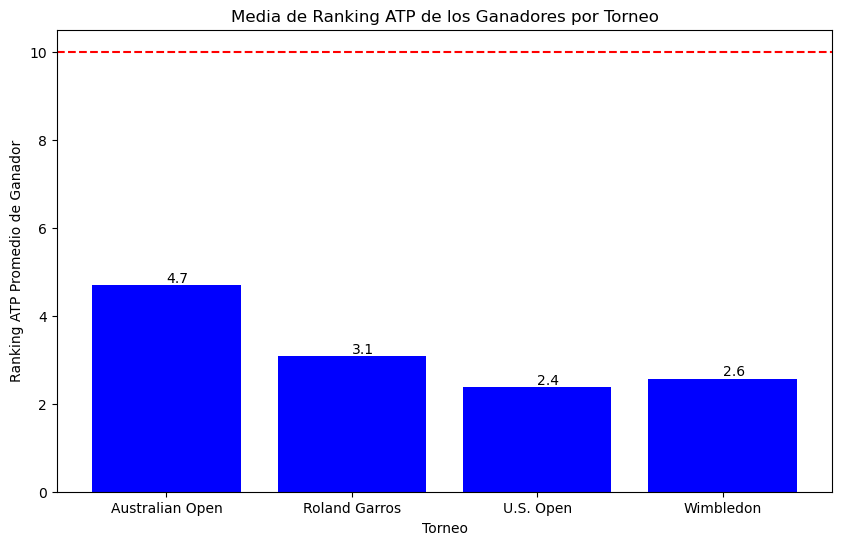

In [29]:
# Configura el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Itera sobre cada grupo de datos por torneo
for tournament, rankings in df_majors.groupby('TOURNAMENT')['WINNER_ATP_RANKING']:
    # Calcula la media y determina el color de la barra
    mean_ranking = rankings.mean()
    color = 'blue' if mean_ranking <= 10 else 'red'
    
    # Crea la barra
    barra = plt.bar(tournament, mean_ranking, color=color)
    
    # Añade texto sobre cada barra
    for bar in barra:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), va='bottom')

# Añade una línea horizontal para el umbral del Top 10
plt.axhline(y=10, color='r', linestyle='--')

# Configura las etiquetas y título del gráfico
plt.xlabel('Torneo')
plt.ylabel('Ranking ATP Promedio de Ganador')
plt.title('Media de Ranking ATP de los Ganadores por Torneo');

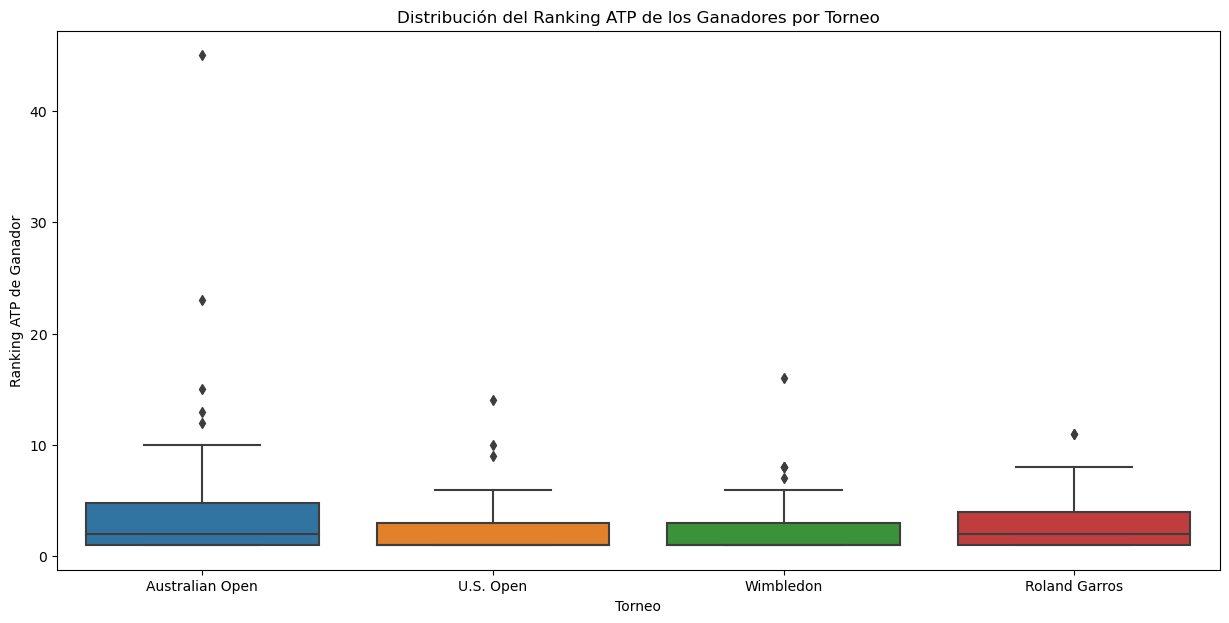

In [44]:
plt.figure(figsize=(15, 7))

# Crea el boxplot
sns.boxplot(x = 'TOURNAMENT', y = 'WINNER_ATP_RANKING', data = df_majors)

# Configura las etiquetas y título del gráfico
plt.xlabel('Torneo')
plt.ylabel('Ranking ATP de Ganador')
plt.title('Distribución del Ranking ATP de los Ganadores por Torneo')

# Muestra el gráfico
plt.show()

In [45]:
# Calcular Q1 y Q3
Q1 = df_majors['WINNER_ATP_RANKING'].quantile(0.25)
Q3 = df_majors['WINNER_ATP_RANKING'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df_majors[(df_majors['WINNER_ATP_RANKING'] < lower_bound) | (df_majors['WINNER_ATP_RANKING'] > upper_bound)]

# Ordenar los outliers por 'TOURNAMENT'
outliers_sorted = outliers.sort_values(by='TOURNAMENT')


In [40]:
outliers_sorted

,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
83,2002,Australian Open,T. Johannson,M. Safin,Swedish,10.0,4.0,right,Rebound Ace,1000000.0
147,1985,Australian Open,S. Edberg,M. Wilander,Swedish,9.0,3.0,right,Grass,100000.0
159,1982,Australian Open,J. Kriek,S. Denton,American,13.0,15.0,right,Grass,77500.0
163,1981,Australian Open,J. Kriek,S. Denton,American,15.0,108.0,right,Grass,72000.0
167,1980,Australian Open,B. Teacher,K. Warwick,American,23.0,38.0,right,Grass,64000.0
183,1977,Australian Open,R. Tanner,G. Vilas,American,12.0,4.0,left,Grass,28000.0
187,1976,Australian Open,M. Edmondson,J. Newcombe,Australian,45.0,21.0,right,Grass,8156.0
102,1997,Roland Garros,G. Kuerten,S. Bruguera,Brazilian,11.0,6.0,right,Clay,3668000.0
162,1982,Roland Garros,M. Wilander,G. Vilas,Swedish,11.0,4.0,right,Clay,400000.0
32,2014,U.S. Open,M. Cilic,K. Nishikori,Croatian,9.0,5.0,right,DecoTurf - outdoors,3000000.0
